# ML Lab Week 2 by Smeet Dedhia 200968236
## Excercise 1

### Q9]Metadata

#### Pima Indians Diabetes Dataset

Number of Instances: 768

Number of Attributes: 8 plus class 

For Each Attribute: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

Missing Attribute Values: None

Class Distribution: (class value 1 is interpreted as "tested positive for
    diabetes")

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
#importing the dataset
diabetes = pd.read_csv("diabetes.csv")
diabetes

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,tested_negative
764,2,122,70,27,0,36.8,0.340,27,tested_negative
765,5,121,72,23,112,26.2,0.245,30,tested_negative
766,1,126,60,0,0,30.1,0.349,47,tested_positive


### Data Preprocessing

In [3]:
#Converting class as a binary variable
diabetes.replace('tested_positive', 1, inplace=True)
diabetes.replace('tested_negative', 0, inplace=True)
diabetes

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
#Dropping rows where BMI is 0
diabetes.drop(diabetes[diabetes['mass']==0].index, inplace=True)

<AxesSubplot:>

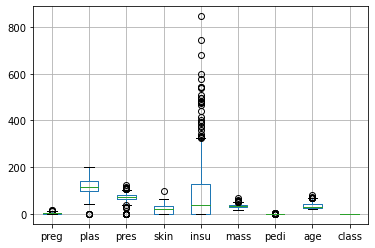

In [5]:
#Examining boxplot to check for outliers
diabetes.boxplot()

'insu' column contains a lot of outliers. Dropping these outliers increases model score from .75 to .79 hence dropping them.

In [6]:
#Dropping outliers greaer than Q3 + 1.5*IQR
Q3=diabetes['insu'].quantile(.75)
IQR = (diabetes['insu'].quantile(.75)-diabetes['insu'].quantile(.25))
diabetes.drop(diabetes[diabetes['insu']>(Q3 + 1.5*IQR)].index, inplace=True)

<AxesSubplot:>

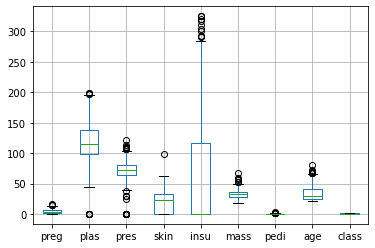

In [7]:
#Insu data distribution has improved
diabetes.boxplot()

In [8]:
#Basic Stats of data
#Q10] Mean & Standard Deviation
diabetes.describe()

,preg,plas,pres,skin,insu,mass,pedi,age,class
count,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000
mean,3.859697,119.580468,69.639615,20.316369,64.588721,32.360935,0.467688,33.257221,0.343879
std,3.390493,31.449006,18.480784,15.923856,81.486229,6.917785,0.319511,11.658177,0.475328
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.244000,24.000000,0.000000
50%,3.000000,115.000000,72.000000,23.000000,0.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,138.000000,80.000000,32.000000,116.000000,36.550000,0.619000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,325.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
#Q10]Tabulating age
diabetes_age = pd.DataFrame(diabetes['age'])
diabetes_age

,age
0,50
1,31
2,32
3,21
4,33
...,...
763,63
764,27
765,30
766,47


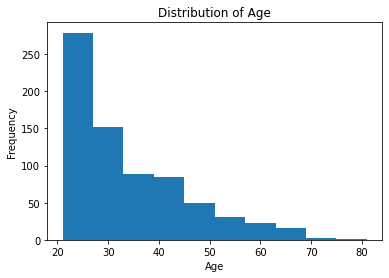

In [10]:
#Visualising age using histogram
plt.title('Distribution of Age')
plt.hist(diabetes_age)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [11]:
#pivot table?
diabetes_corr=diabetes[['mass','age','class']].corr()
diabetes_corr['class']

mass     0.321486
age      0.231586
class    1.000000
Name: class, dtype: float64

[Text(0.5, 1.0, 'Heatmap for Correlation between BMI, Age & Class')]

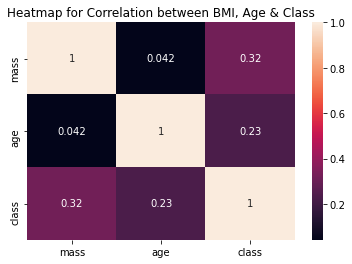

In [12]:
sns.heatmap(diabetes_corr, annot=True).set(title='Heatmap for Correlation between BMI, Age & Class')

<h4>Using the correlation co-efficients and heamap we can analyze</h4><br>
1. There is no correlation between Age and BMI<br>
2. There is very weak correlation between BMI(mass) and Diabetes(class) with correlation coefficient of 0.32<br>
3. There is an even smaller correlation between Age and Diabetes(class)<br>

In [36]:
#Tabulation of Class Label
diabetes_classLabels = pd.DataFrame(diabetes['class'].value_counts())
diabetes_classLabels

,class
0,477
1,250


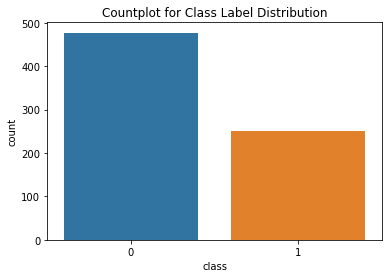

In [40]:
#Visualisation of Class labels
sns.countplot(x='class',data=diabetes).set(title="Countplot for Class Label Distribution")
plt.show()

The class labels are not balanced.<br>
There are 90% more tuples with Diabetes=0 as compared to Diabetes=1

In [15]:
diabetes.corr()['class']

preg     0.222283
plas     0.467892
pres     0.054112
skin     0.057307
insu     0.099140
mass     0.321486
pedi     0.192401
age      0.231586
class    1.000000
Name: class, dtype: float64

In [17]:
#Scaling Input for Logistic Regression
diabetes_scaled = pd.DataFrame(diabetes)
diabetes_scaled

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [18]:
mscaler = MinMaxScaler()
for col in ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age']:
    diabetes_scaled[col]=mscaler.fit_transform(diabetes_scaled[col].values.reshape(-1,1))
diabetes_scaled

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.314928,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.171779,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.104294,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.289231,0.202454,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.516923,0.509202,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.553846,0.300613,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.380368,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.344615,0.163599,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.243354,0.115713,0.433333,1


In [19]:
#Q13]Logistic Regression Model
x = diabetes_scaled[['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age']]
y = diabetes_scaled['class']

In [20]:
#30% - 70% test train split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3, random_state=42)

In [23]:
y_test.value_counts()

0    148
1     71
Name: class, dtype: int64

In [24]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [25]:
logreg.coef_

array([[ 1.45833546,  4.01842916, -0.61069575, -0.09305226,  0.13511478,
         2.98119238,  1.64958034,  0.76138787]])

In [28]:
#Score for Logistic Model
logreg.score(x_test, y_test)

0.7990867579908676

In [30]:
#Q14] Confusion Matrix
cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), index=['True_0', 'True_1'], columns=['Predicted_0','Predicted_1'])
cm

,Predicted_0,Predicted_1
True_0,139,9
True_1,35,36


[Text(0.5, 1.0, 'Heatmap for Confusion Matrix')]

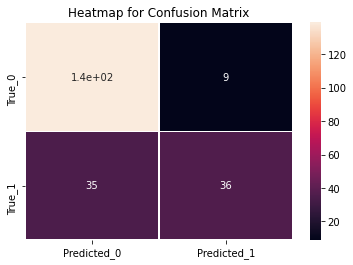

In [39]:
# Heatmap for confusion matrix
sns.heatmap(cm, linewidths = 0.30, annot = True).set(title="Heatmap for Confusion Matrix")

#### Q15]
Accuracy Rate = (TP + TN)/(P+N) = .7991 = 79.91%<br>
True Positive Rate = TP/(TP+FN) =  0.51 = 50.7%<br>
True Negative Rate = TN/(TN+FP) =  .94 = 93.9%<br>

In [32]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

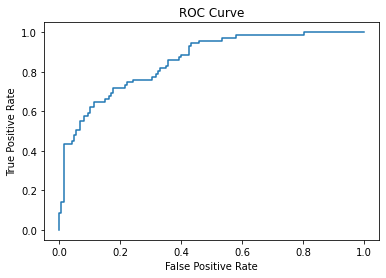

In [38]:
#ROC Curve
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

plt.title("ROC Curve")
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Performance of the classifier is good as it achieves a score of 80%. <br>
However, with a True Positive Rate of only 51%, the model is not able to predict Presence of Diabetes with good accuracy.<br>
But, with True Negative Rate of 93.9%, the model is quite accurate in predicting Absence of Diabetes